<a href="https://colab.research.google.com/github/FadlilaAfida/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import folder drive

In [1]:
from google.colab import drive

# Accesing My Google drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Import library

In [2]:
import cv2 as cv
from  google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

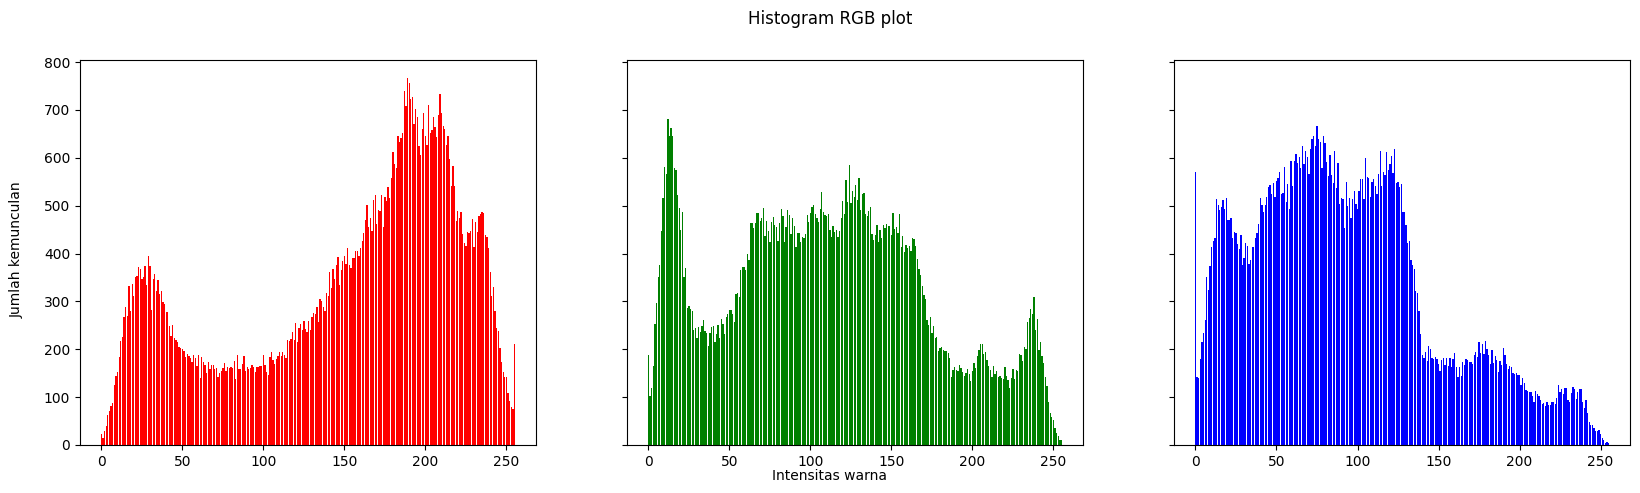

In [3]:
#input Image
img = cv.imread('/content/drive/MyDrive/PCVK_Gambar/lena1.jpg')

height, width, depth = np.shape(img)
name = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

#menghitung jumlah kemunculan tiap pixel
for y in range(0,height) :
  for x in range(0,width) :
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

#membuat histogram
name = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')

#menampilkan histogram citra
axs[0].bar(name, red, color='red')
axs[1].bar(name, green, color='green')
axs[2].bar(name, blue, color='blue')

##4. Membuat histogram menggunakan library Numpy

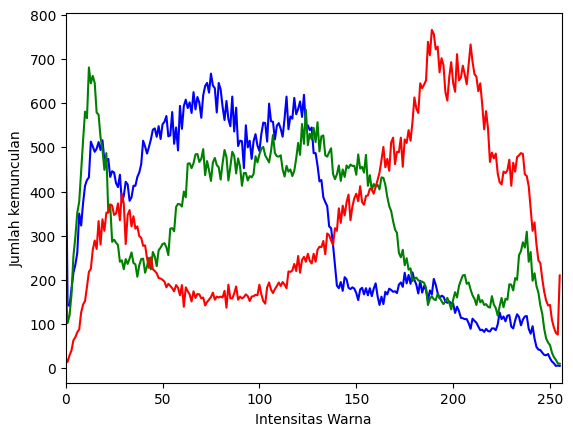

In [4]:
color = ("b","g","r")
channel = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel, color):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

##5. Membuat histogram equalization dan juga tampilan gambar sebelum dan sesudah

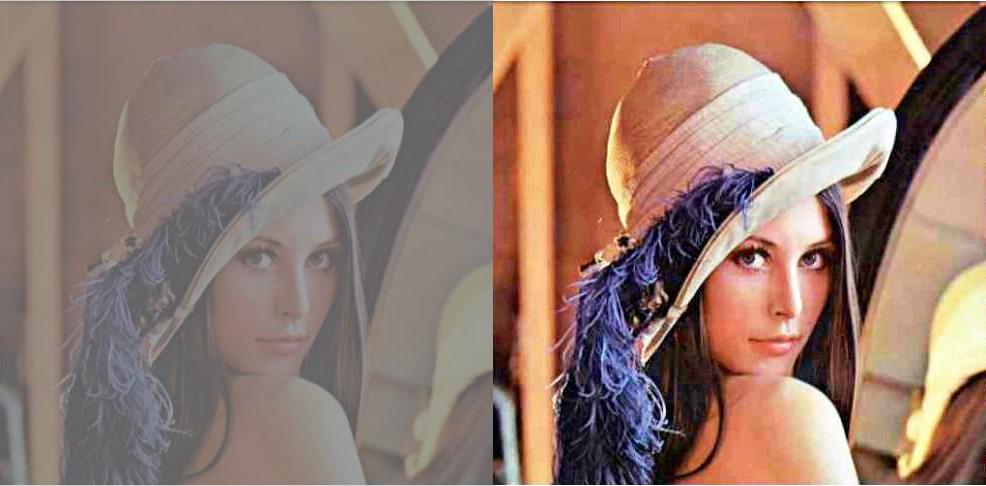

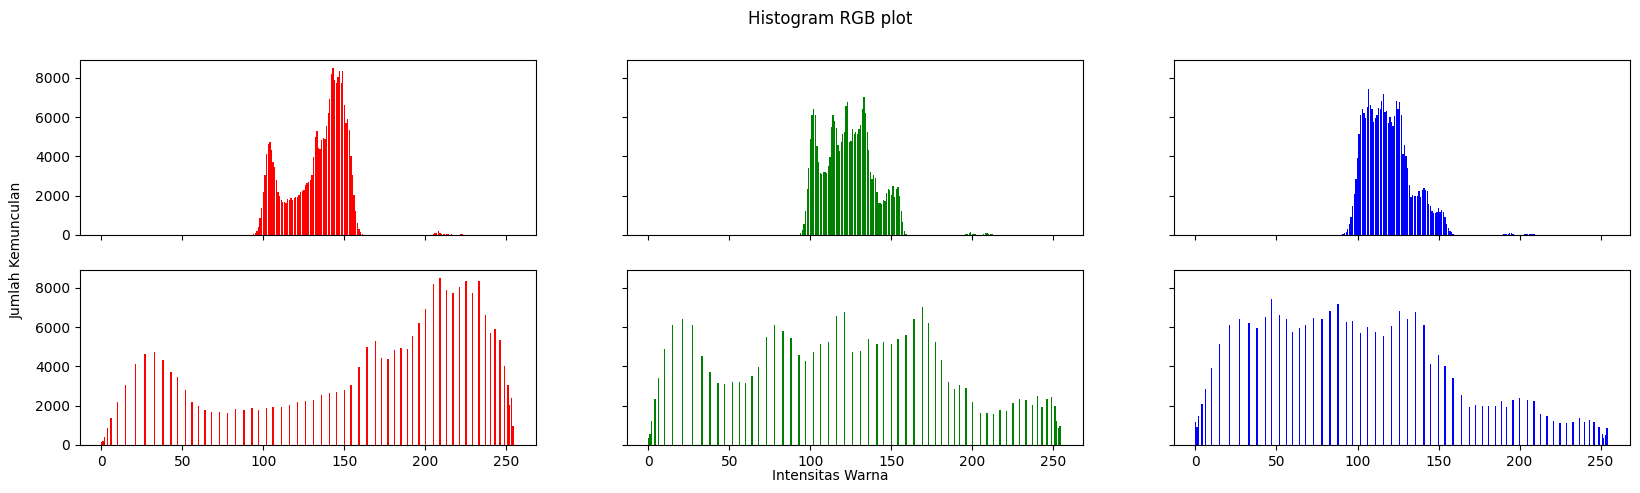

In [39]:
#input gambar
img = cv.imread('/content/drive/MyDrive/PCVK_Gambar/lena_lc.jpg')

#menghitung kemunculan setiap pixel warna pada nilai tertentu
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

img_array = np.asarray(img)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

#Penjumlahan kumulatif dari frekuensi yang di ketahui kemudian di bagi jumlah pixel
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#Normalisasi kumulatif
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)


img_list = list(img_array.flatten())

# konversi ke equalize
eq_img_list = [transform_map[p] for p in img_list]

# Konversi ke bentuk citra
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## 6.Histogram dari soal no.5 menggunakan library CV2

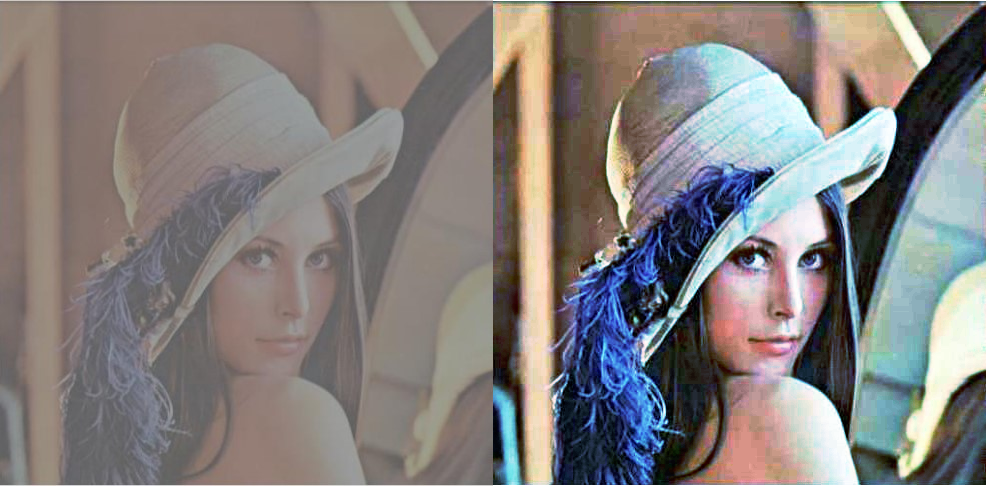

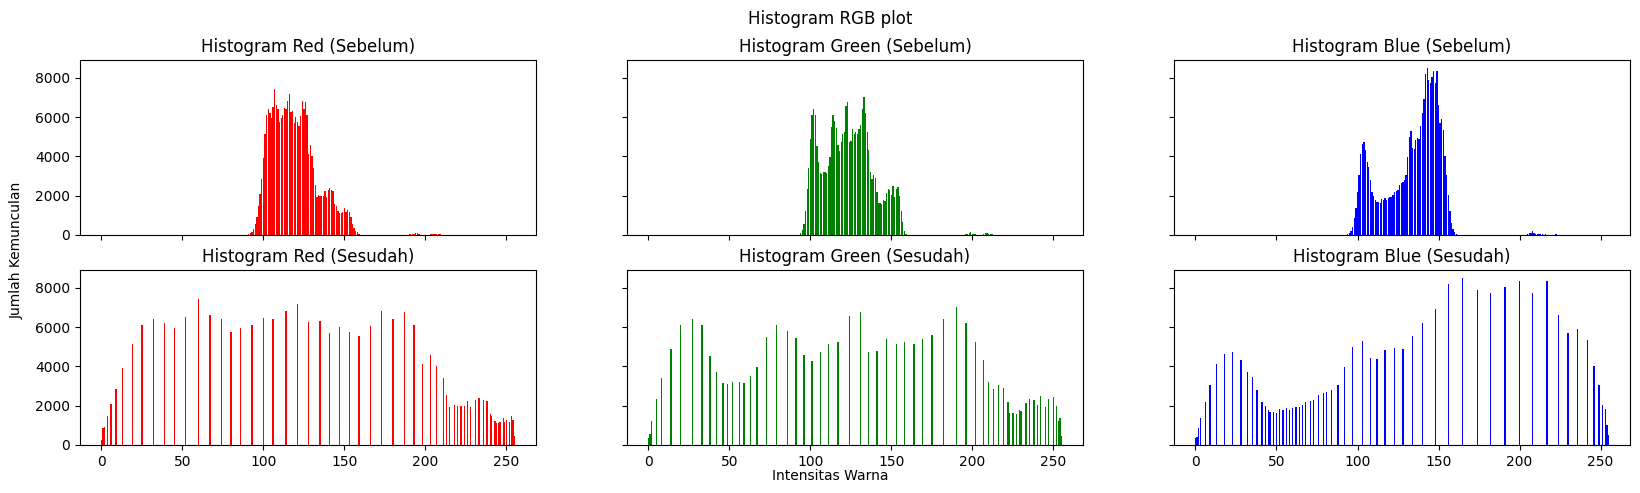

In [43]:
# Baca gambar Lena
img1 = cv.imread('/content/drive/MyDrive/PCVK_Gambar/lena_lc.jpg')

# Fungsi untuk menghitung histogram
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

# Hitung histogram citra asli
histo_asli = histog(img1)

# Lakukan Histogram Equalization pada masing-masing saluran warna
equalized_channels = [cv.equalizeHist(img1[:, :, i]) for i in range(3)]

# Gabungkan saluran warna yang telah diekualisasi
img2 = cv.merge(equalized_channels)

# Hitung histogram citra hasil equalization
equal_histo = histog(img2)

# Menampilkan gambar sebelum dan sesudah proses Histogram Equalization
final_frame = cv.hconcat((img1, img2))  # Gabungkan gambar
cv2_imshow(final_frame)  # Gunakan cv2_imshow untuk menampilkan gambar di Colab

# Plot histogram sebelum dan sesudah proses Histogram Equalization
names = np.arange(256)

fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

for i, color in enumerate(['red', 'green', 'blue']):
    axs[0, i].bar(names, histo_asli[i], color=color)
    axs[0, i].set_title(f'Histogram {color.capitalize()} (Sebelum)')

    axs[1, i].bar(names, equal_histo[i], color=color)
    axs[1, i].set_title(f'Histogram {color.capitalize()} (Sesudah)')

plt.show()

##7. proses pemetaan 16 juta warna RGB ke dalam 8 warna saja yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

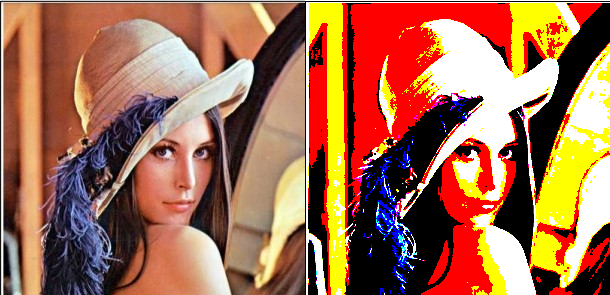

True

In [14]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

img1 = cv.imread('/content/drive/MyDrive/PCVK_Gambar/lena.jpg')
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK_Gambar/lena.jpg', img_8)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

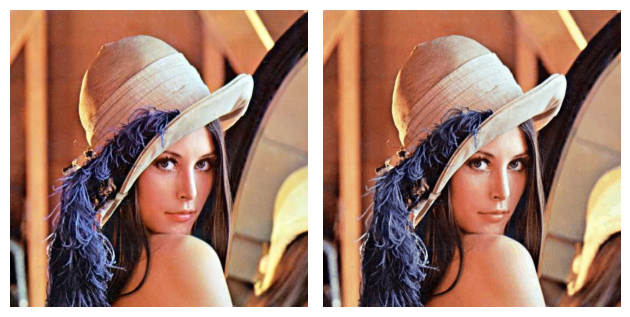

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar asli
image = Image.open('/content/drive/MyDrive/PCVK_Gambar/lena2.jpg')

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

# Terapkan dithering Floyd-Steinberg
image_dithered = image.convert('P', palette=Image.ADAPTIVE, dither=Image.FLOYDSTEINBERG)

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(image_dithered)
plt.axis('off')

# Tampilkan plot
plt.tight_layout()
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

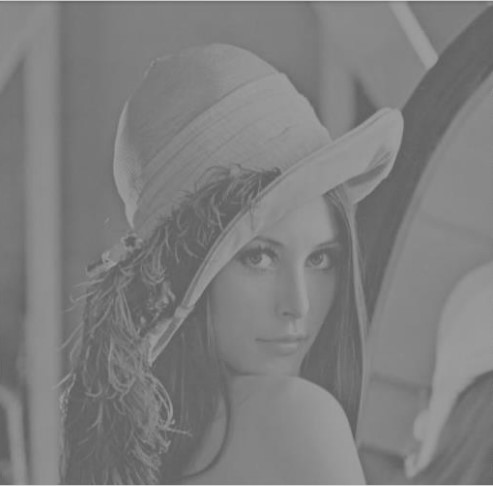

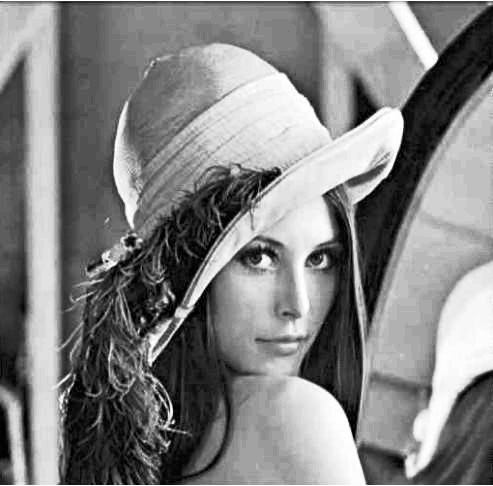

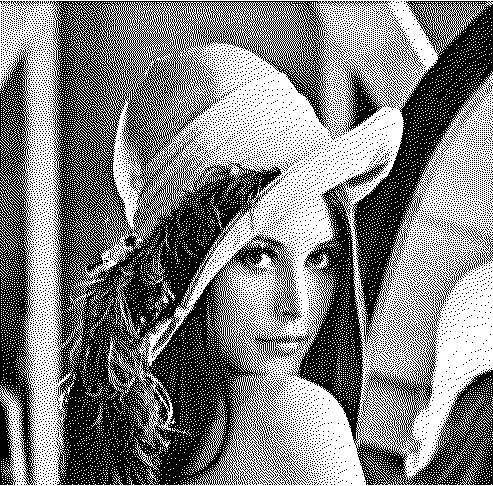

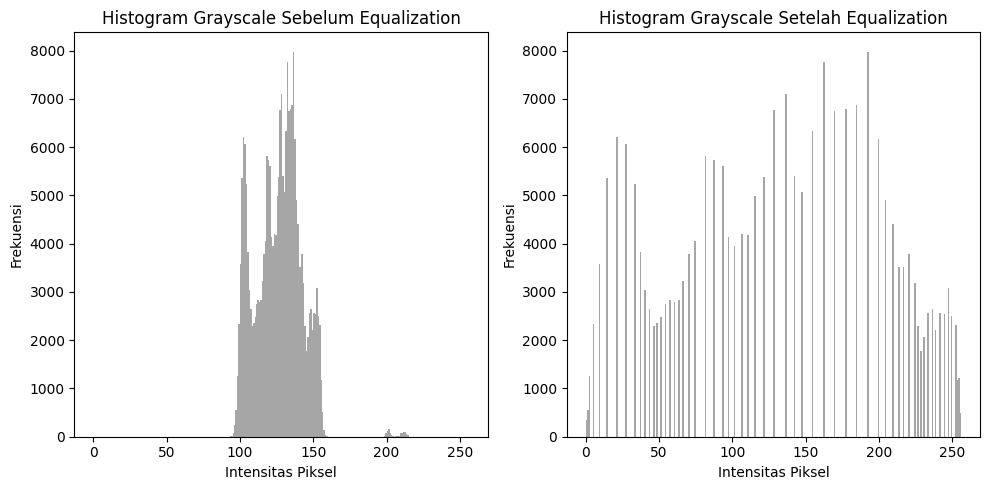

In [25]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke citra grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv2.equalizeHist(img)

# Terapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)
# Menampilkan gambar hasil
cv2_imshow(img)
cv2_imshow(equalized_img)
cv2_imshow(output_img)

# Plot histogram dari citra grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Plot histogram dari citra setelah equalization
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()